In [1]:
import os 
from glob import glob

import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets

In [2]:
mnist = datasets.mnist

In [3]:
(images,_), _ = mnist.load_data()

image = images[:1, ..., tf.newaxis]
images.shape, image.shape

((60000, 28, 28), (1, 28, 28, 1))

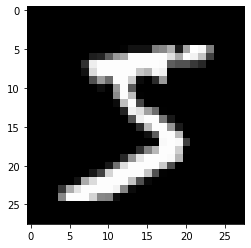

In [4]:
plt.imshow(image[0, :, :, 0], 'gray')
plt.show()

In [5]:
img = image.astype(np.float32)

In [6]:
# filtersize, kernel
net = tf.keras.layers.Conv2D(3, 3, strides=1, padding='same')
output = net(img)
weight = net.get_weights()[0]

weight.shape  
(3,3,1,3) ???

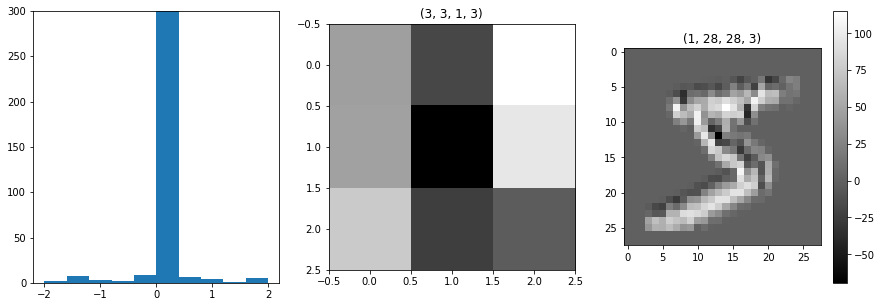

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0,300)

plt.subplot(132)
plt.title(weight.shape)
plt.imshow(weight[:, :, 0, 0], 'gray')

plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()

plt.show()

In [8]:
net = tf.keras.layers.ReLU()
output = net(output)

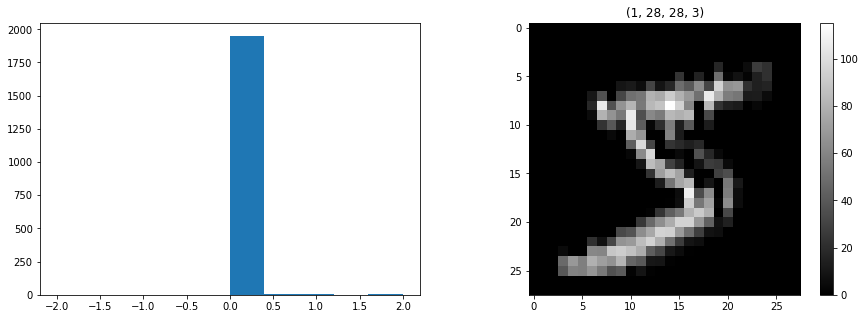

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
# ravel 은 flaten 해주는것
plt.hist(output.numpy().ravel(), range=[-2,2])

plt.subplot(122)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()

plt.show()

In [12]:
net = tf.keras.layers.MaxPool2D((2,2))
output = net(output)

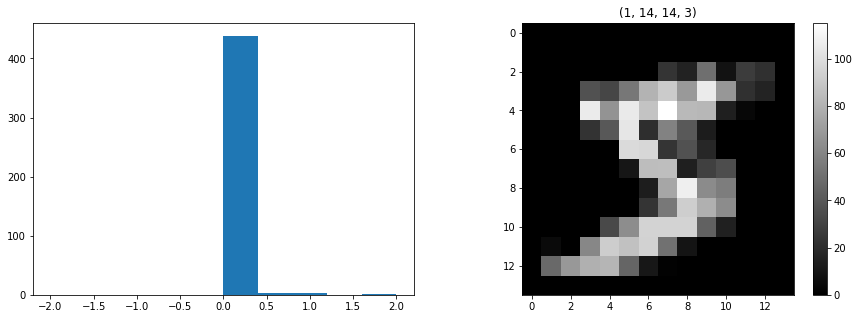

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(121)
# ravel 은 flaten 해주는것
plt.hist(output.numpy().ravel(), range=[-2,2])

plt.subplot(122)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()